# Case Study - Image Classification using Deep CNN in Keras.


<h1>Context<h1/>

- The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes.
- The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.
- There are 6,000 images of each class.

<h2>Understand the labels:<h2/>

- airplane : 0
- automobile : 1
- bird : 2
- cat : 3
- deer : 4
- dog : 5
- frog : 6
- horse : 7
- ship : 8
- truck : 9

## Add-on:
What type of classification is this?

<h1>Problem Statement<h1/>

- Image Classification using Deep CNN in Keras and also some edge detection operation.


<h1>Import all necessary modules and load the data<h1/>

In [1]:
# Import necessary modules.

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras import datasets, models, layers, optimizers,utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Set the batch size, number of epochs.
batch_size = 32
num_classes = 10
epochs = 40
num_predictions = 20


In [4]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()


170500096/170498071 [==============================] - 2s 0us/step


In [5]:
# Print the shape of dataset.
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [6]:
x_train[9, :, :, :].shape

(32, 32, 3)

## Highlights:
- How to select the 10th image?
- How to get the red pixels only?
- What is the shape of resulting array?

In [7]:
y_train.shape

(50000, 1)

- The training set contains 50000 images.
- The size of each image is 32x32 pixels.
- Each image has 3 color channels.

In [8]:
y_train[0]

array([6], dtype=uint8)

- The label of image at index = 0 is 6:"frog".

In [9]:
label_dict =  {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}


<h2>Explore the Data<h3/>

- Understanding a dataset is part of making predictions on the data. 
- It answers some of questions like in a given data..
  - "What are the possible labels?"
  - "What is the range of pixel values for the image data?"
  - "Is there noise in data ?"
  - "Do we need additional preprocessing steps ?"


Label 
 Label Id: 6 
 Name: frog
Label 
 Label Id: 9 
 Name: truck
Label 
 Label Id: 9 
 Name: truck
Label 
 Label Id: 4 
 Name: deer
Label 
 Label Id: 1 
 Name: automobile
Label 
 Label Id: 1 
 Name: automobile
Label 
 Label Id: 2 
 Name: bird
Label 
 Label Id: 7 
 Name: horse
Label 
 Label Id: 8 
 Name: ship


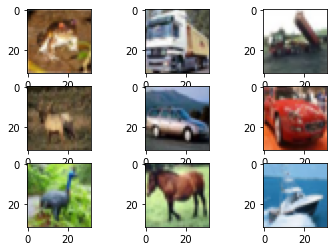

In [10]:
i = 0
for i in range(9):
  plt.subplot(330 + 1 + i)
  image = x_train[i]
  label = y_train[i][0]
  #print(' Label \n Label Id: {} \n Name: {}'.format(label, label_dict[label]))
  print(f'Label \n Label Id: {label} \n Name: {label_dict[label]}')
  plt.imshow(image);



## Add-on:
- Without checking, what is the shape of `image`
- How to rewrite the print statement using `f-string`?

- The above image of a frog.
- The Label ID is 6.
- As we can see the x-axis and y-axis of image, it shows that there are 32 pixels on each directions.

Label 
 Label Id: 0 
 Name: airplane


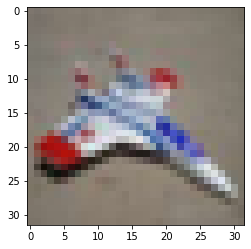

In [11]:
i = 30
image = x_train[i]
label = y_train[i][0]
#print(' Label \n Label Id: {} \n Name: {}'.format(label, label_dict[label]))
print(f'Label \n Label Id: {label} \n Name: {label_dict[label]}')
plt.imshow(image);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


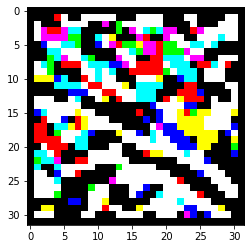

In [12]:
sobel = cv2.Sobel(image, cv2.CV_64F, 1, 1, ksize=5)
plt.imshow(sobel)


- As the image quality is not good, the edges are not so good. But still we can visualize that there are edges.

In [13]:
y_train[i]

array([0], dtype=uint8)

In [14]:
print(y_train.shape)
print('\n')
print(y_train[0])

(50000, 1)


[6]


In [15]:
# Convert labels to one hot vectors.

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train = enc.fit_transform(y_train)
y_test = enc.fit_transform(y_test)

#Alternate way
#y_train = keras.utils.to_categorical(y_train,num_classes) 
#y_test = keras.utils.to_categorical(y_train,num_classes)
# 3 -> 0 0 1 0 0 0 0 0 0 0 
# If use loss - sparse categorical crossentropy - then label can be numbers, [0,7,6,2,4,5], here use the other loss - categorical entropy where we need it. 

In [16]:
print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


In [17]:
y_train[0]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

## Please Note:
There are many tools to one-hot encode and they differ in syntax, but the keras one is probably best implemented.
- `keras.utils.to_categorical`
- `sklearn.preprocessing.OneHotEncoder`
- `pandas get_dummies`

In [18]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
#y = [[0], [1], [2], [3]]
y = [0, 1, 2, 3]
utils.to_categorical(y)
#ohe = OneHotEncoder()
#ohe.fit_transform(y).toarray()
#pd.get_dummies(y)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)

<h1>Create the Model:<h1/>

- Convolutional input layer, 32 feature maps with a size of 5×5 and a rectifier activation function.
- Batch Normalization Layer.
- Convolutional layer, 32 feature maps with a size of 5×5 and a rectifier activation function.
- Batch Normalization layer.
- Max Pool layer with size 2×2.
- Dropout layer at 25%.
---
- Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
- Batch Normalization layer.
- Dropout layer at 25%.
- Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
- Batch Normalization layer.
- Max Pool layer with size 2×2.
- Dropout layer at 25%.
---
- GlobalMaxPooling2D layer.
- Fully connected layer with 256 units and a rectifier activation function.
- Dropout layer at 50%.
- Fully connected output layer with 10 units and a softmax activation function.


In [19]:
# Set the CNN model

batch_size = None

model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=x_train.shape[1:]))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation="softmax"))

model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

# Number of parameters in the CNN layers:

- ## Number of Parameters of a Conv Layer:
In a CNN, each layer has two kinds of parameters : weights and biases. The total number of parameters is just the sum of all weights and biases.

  Let’s define,

  - W_c = Number of weights of the Conv Layer.
  - B_c = Number of biases of the Conv Layer.
  - P_c = Number of parameters of the Conv Layer.
  - K = Size (width) of kernels used in the Conv Layer.
  - N = Number of kernels.
  - C = Number of channels of the input image.

    W<sub>c</sub> = K<sup>2</sup> x C x N
    
    B<sub>c</sub> = N

    P<sub>c</sub> = W<sub>c</sub> + B<sub>c</sub>


  So, we will use this formulae for our parameter calculation of first layer:
    
    model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=x_train.shape[1:]))

  So the number of parameters is given by:

  Number of weights = W<sub>c</sub> = 5<sup>2</sup> x 3 x 32 = 2400

  Number of biases = B<sub>c</sub> = 32

  Total number of parameters for this layer = P<sub>c</sub> = 2400 + 32 = 2432


  We can verify this number by looking at the model summary.

    conv2d (Conv2D)              (None, 32, 32, 32)        2432

- ## Number of Parameters of a MaxPool Layer:
There are no parameters associated with a MaxPool layer. The pool size, stride, and padding are hyperparameters.

- ## Number of Parameters of a Fully Connected (FC) Layer:
There are two kinds of fully connected layers in a CNN. The first FC layer is connected to the last Conv Layer, while later FC layers are connected to other FC layers. Let’s consider each case separately.

  - ### Case 1: Number of Parameters of a Fully Connected (FC) Layer connected to a Conv Layer:
  Let’s define,

    W_{cf} = Number of weights of a FC Layer which is connected to a Conv Layer.

    B_{cf} = Number of biases of a FC Layer which is connected to a Conv Layer.
    
    O = Size (width) of the output image of the previous Conv Layer.
    
    N = Number of kernels in the previous Conv Layer.
    
    F = Number of neurons in the FC Layer.

      - W<sub>cf</sub> = O<sup>2</sup> x N x F
    
      - B<sub>cf</sub> = F

      - P<sub>cf</sub> = W<sub>cf</sub> + B<sub>cf</sub>

    Example: The first fully connected layer of our model is connected to a Conv Layer. For this layer, O = 1 (the width and height of image after global maxpooling), N = 64 and F = 256. Therefore,

      - Number of weights = W<sub>cf</sub> = 1<sup>2</sup> x 64 x 256 = 16384

      - Number of biases = B<sub>c</sub> = 256

      - Total number of parameters for this layer = P<sub>c</sub> = 16384 + 256 = 16640

    We can verify this number by looking at the model summary.
      
            dense (Dense)                (None, 256)               16640 

  - ### Case 2: Number of Parameters of a Fully Connected (FC) Layer connected to a FC Layer
  Let’s define,

    W<sub>ff</sub> = Number of weights of a FC Layer which is connected to an FC Layer.

    B<sub>ff</sub> = Number of biases of a FC Layer which is connected to an FC Layer.
    
    P<sub>ff</sub> = Number of parameters of a FC Layer which is connected to an FC Layer.
    
    F = Number of neurons in the FC Layer.
    
    F<sub>-1</sub> = Number of neurons in the previous FC Layer.

      - W<sub>ff</sub> = F<sub>-1</sub> x F

      - B<sub>ff</sub> = F

      - P<sub>ff</sub> = W<sub>ff</sub> + B<sub>ff</sub>

    In the above equation, **F<sub>-1</sub> x F** is the total number of connection weights from neurons of the previous FC Layer the neurons of the current FC Layer. The total number of biases is the same as the number of neurons (F).

    Example: The last fully connected layer of AlexNet is connected to an FC Layer. For this layer, **F<sub>-1</sub>** = 256 and **F** = 10. Therefore,

      - Number of weights = W<sub>cf</sub> = 256 x 10 = 2560

      - Number of biases = B<sub>c</sub> = 10

      - Total number of parameters for this layer = P<sub>c</sub> = 2560 + 10 = 2570

    We can verify this number by looking at the model summary.
      
            dense_1 (Dense)              (None, 10)                2570

## Please Note:
> Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers.

https://keras.io/api/layers/activations/

<h3>Conv2D:<h3/>

- Keras Conv2D is a 2D Convolution Layer, this layer creates a convolution kernel that is wind with layers input which helps produce a tensor of outputs.

<h3>Activation('relu'):<h3/>

- 'relu' stands for Rectified linear unit. It is the most widely used activation function. Chiefly implemented in hidden layers of Neural network.
- ReLu is less computationally expensive than tanh and sigmoid because it involves simpler mathematical operations. At a time only a few neurons are activated making the network sparse making it efficient and easy for computation.

<h3>MaxPooling2D:<h3/>

- The objective MaxPooling Layer is to down-sample an input representation.
- This is done to in part to help over-fitting by providing an abstracted form of the representation. As well, it reduces the computational cost by reducing the number of parameters to learn.

<h3>Dropout:<h3/>

- Dropout is a technique used to improve over-fit on neural networks.
- Basically during training half of neurons on a particular layer will be deactivated. This improve generalization.
- Normally some deep learning models use Dropout on the fully connected layers, but is also possible to use dropout after the max-pooling layers, creating some kind of image noise augmentation.

<h3>Dense:<h3/>

- Dense layer implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True).

<h3>Softmax:<h3/>

- The softmax function is also a type of sigmoid function but is handy when we are trying to handle classification problems.
- Usually used when trying to handle multiple classes. The softmax function would squeeze the outputs for each class between 0 and 1 and would also divide by the sum of the outputs.
______________

## Add-on:
How to handle multilabel classification?

<h4>When training the network, what you want is minimize the cost by applying a algorithm of your choice. It could be SGD, AdamOptimizer, AdagradOptimizer, or something. You have to study how each algorithm works to choose what to use, but AdamOptimizer works find for most cases in general.<h4/>

In [20]:
# initiate Adam optimizer
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
# inbuilt parameters for optimizer 

In [21]:
# Let's train the model using Adam
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])



## Add-on:
Which loss function to use? It depends :)

https://stackoverflow.com/questions/42081257/why-binary-crossentropy-and-categorical-crossentropy-give-different-performances

In [22]:
# Network structure is summarized which confirms our design was implemented correctly.
model.summary()

#Wc = K2 x C x N
#Bc = N
#Pc = Wc + Bc
# Get to know how many params to train and how much time it would take idea, Computation resources reqd such as GPU, 
# 5 * 5 * 3 * 32 + 32


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

- The pixel values are in the range of 0 to 255 for each of the red, green and blue channels.

- It is good practice to work with normalized data. Because the input values are well understood, we can easily normalize to the range 0 to 1 by dividing each value by the maximum observation which is 255.

- Note, the data is loaded as integers, so we must cast it to floating point values in order to perform the division.

In [23]:
x_train = x_train.astype('float32') # Conversion to float type from integer type.
x_test = x_test.astype('float32')
x_train /= 255.0 # Division by 255
x_test /= 255.0


In [24]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)
 

In [25]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)

print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


<h2>Fit the model:<h2/>

-  We can fit this model with 40 epochs and a batch size of 32.

- A small number of epochs was chosen to quickly run the code so we can understand the concepts ahead. Normally the number of epochs would be one or two orders of magnitude larger for this problem.

Epoch 1/40
1563/1563 [==============================] - 42s 6ms/step - loss: 2.1608 - accuracy: 0.2460 - val_loss: 1.7117 - val_accuracy: 0.3973

Epoch 00001: val_loss improved from inf to 1.71175, saving model to cifar_cnn_checkpoint_01_loss1.7117.h5
Epoch 2/40
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5788 - accuracy: 0.4132 - val_loss: 1.4717 - val_accuracy: 0.4694

Epoch 00002: val_loss improved from 1.71175 to 1.47174, saving model to cifar_cnn_checkpoint_02_loss1.4717.h5
Epoch 3/40
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4020 - accuracy: 0.4926 - val_loss: 1.3547 - val_accuracy: 0.5288

Epoch 00003: val_loss improved from 1.47174 to 1.35466, saving model to cifar_cnn_checkpoint_03_loss1.3547.h5
Epoch 4/40
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2816 - accuracy: 0.5413 - val_loss: 1.3777 - val_accuracy: 0.5075

Epoch 00004: val_loss did not improve from 1.35466
Epoch 5/40
1563/1563 [====================

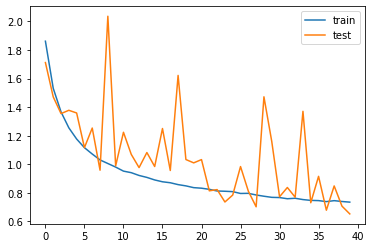

In [26]:
history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    shuffle=True,
                    verbose=1,
                    callbacks=[early_stopping,model_checkpoint])

# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


<h2>Model Score:<h2/>

- Once the model is fit, we evaluate it on the test dataset and print out the classification accuracy

In [27]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
# For final model improvement, use Keras Tuner for HyperParameter Tuning

313/313 [==============================] - 1s 3ms/step - loss: 0.6524 - accuracy: 0.7895
Test loss: 0.6523804068565369
Test accuracy: 0.7894999980926514


<h3>The above score shows that the accuracy is good, as we used number of epochs = 30.
If we use more epochs and tune the hyper-parameters more then we can get some more accuracy score. As our focus on the case study was to learn about the use of CNNs for image classification, we needed to run the code thoroughly so we set number of epochs to less. <h3/>

# Summary:

<h3>In this case study we discovered how to create deep CNNs in Keras for image classification.<h3/>

After working through this case study we learned:

- About the CIFAR-10 dataset and how to load it in Keras and plot examples from the dataset.
- How to train and evaluate a Convolutional Neural Network on the problem.


## Additional Reading Material Links:

- Benefits of using pooling layers https://stats.stackexchange.com/questions/288261/why-is-max-pooling-necessary-in-convolutional-neural-networks
- Why padding? https://stats.stackexchange.com/questions/246512/convolutional-layers-to-pad-or-not-to-pad
- More CNN's   
  - https://towardsdatascience.com/simple-introduction-to-convolutional-neural-networks-cdf8d3077bac
- Neural Network Architectures  https://towardsdatascience.com/neural-network-architectures-156e5bad51ba 

Label 
 Label Id: 0 
 Name: airplane


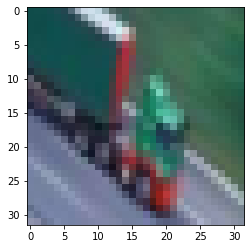

In [28]:
i = 50
image = x_train[i]
label = y_train[i][0]
#print(' Label \n Label Id: {} \n Name: {}'.format(label, label_dict[label]))
print(f'Label \n Label Id: {label} \n Name: {label_dict[label]}')
plt.imshow(image);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


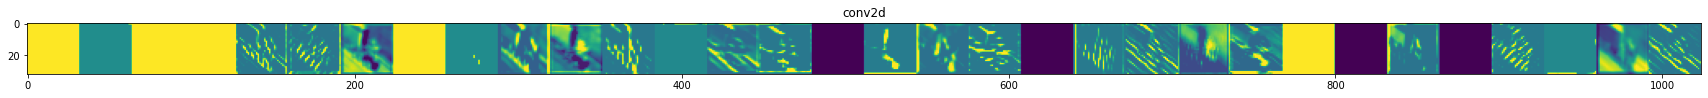

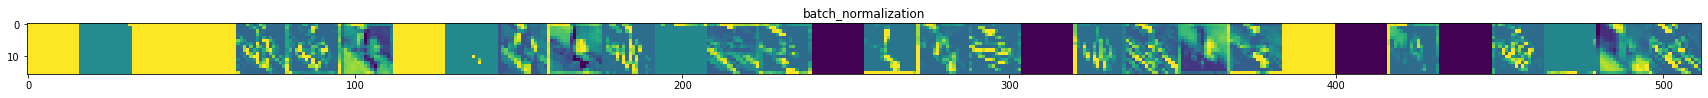

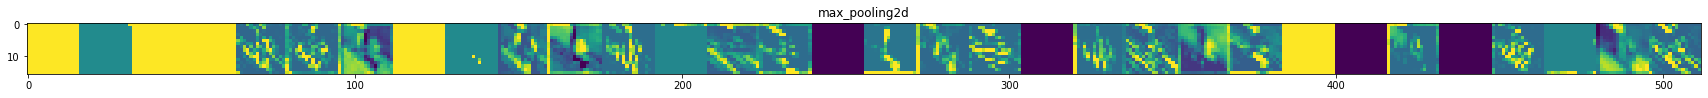

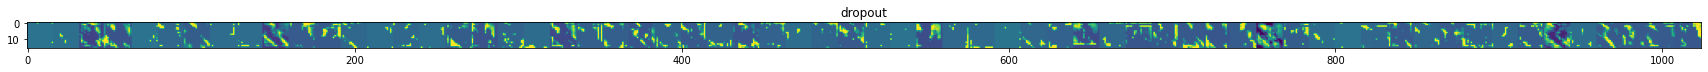

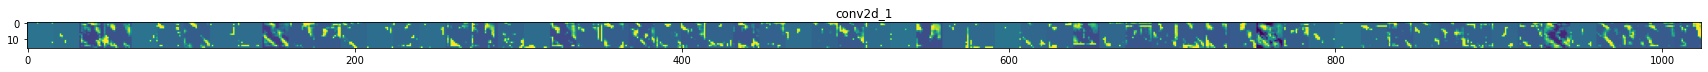

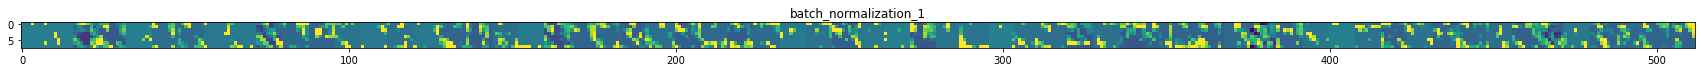

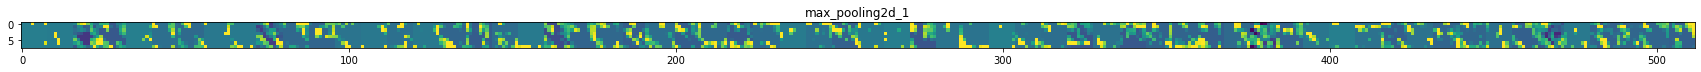

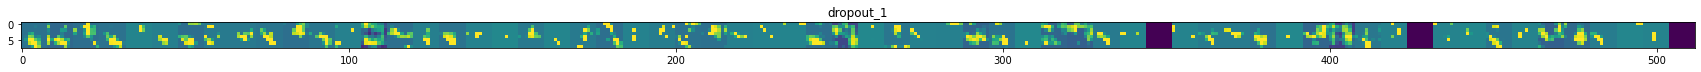

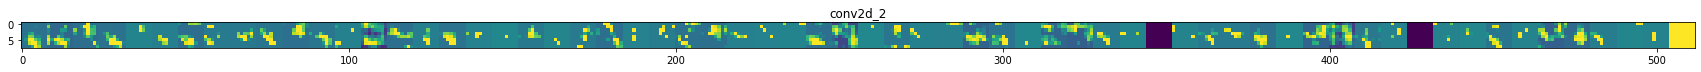

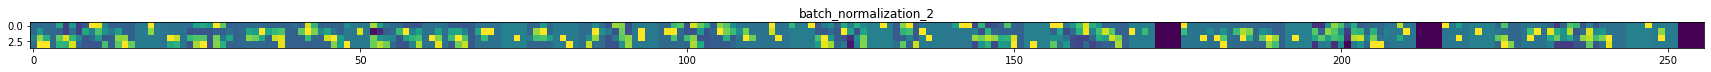

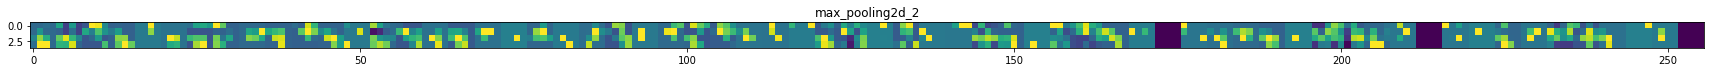

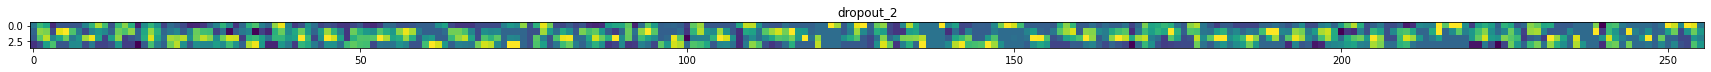

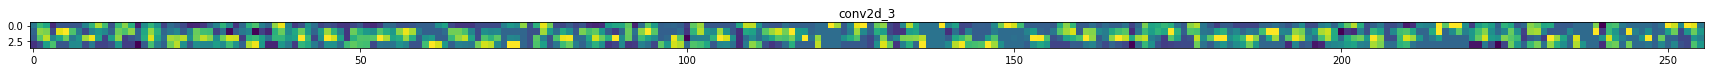

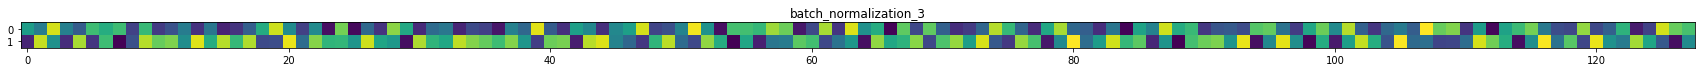

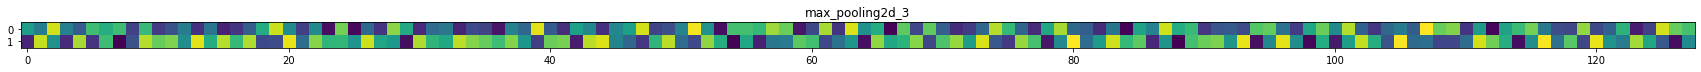

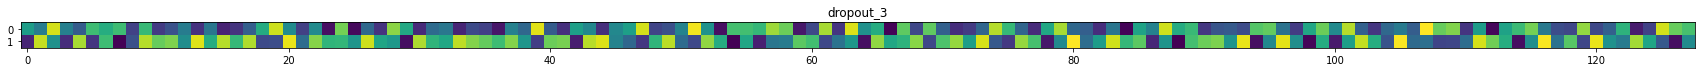

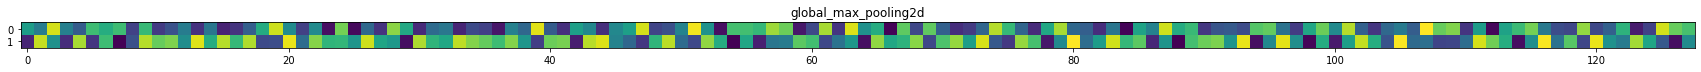

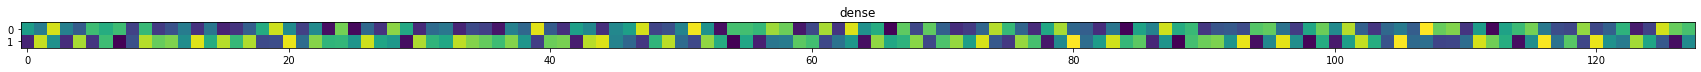

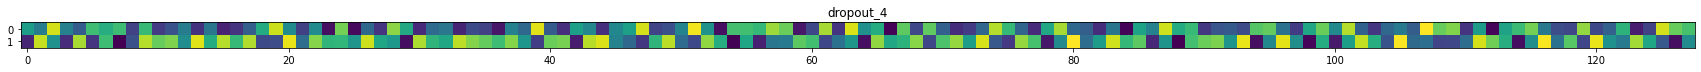

In [30]:
# How diff layers add up on each other for an image - Visualization using the model created
import random
from tensorflow.keras.preprocessing.image import img_to_array,load_img
from tensorflow.keras.models import Model

#Define model that will take input image and will output intermediate representations for all layers in the previous model after the first
successive_outputs = [layer.output for layer in model.layers[1:]]  # Get every layer output

#Visualize
visualization_model = Model(inputs = model.input,outputs = successive_outputs) # create a visualization for each layer with input passed and successive output for each layer

#Lets prepare random input image from training set
x = np.expand_dims(x_train[i],0)  # Convert to 1,32,32,3

#Run image through our network, thus obtaining all intermediate representations for this image
successive_feature_maps = visualization_model.predict(x)  # Get all feature maps at each layer - Feature map is equivalent to each filter output

#These are names of layers so we have them as part of our plot
layer_names = [layer.name for layer in model.layers]

for layer_name,feature_map in zip(layer_names,successive_feature_maps):  # Combines layer and feature maps for each layer
  if len(feature_map.shape) == 4:  

    # Do this for Conv / Pool layers and not Fully Connected Layers
    n_features = feature_map.shape[-1] # number of features in feature map
    size = feature_map.shape[1] # feature map shape (1, size, size, n_features)

    #We will tile our images in this matrix
    display_grid = np.zeros((size,size*n_features))

    # Postprocess the feature to be visually palatable - scale each feature generated on same scale in feature map
    for i in range(n_features):
      x = feature_map[0,:,:,i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x,0,255).astype('uint8')
      display_grid[:,i*size : (i+1)*size] = x #Tile each filter into a horizontal grid

  # Display the grid
  scale = 30. / n_features
  plt.figure(figsize=(scale*n_features,scale))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid,aspect = 'auto',cmap = 'viridis')


# Transfer Learning

In [31]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.applications import VGG16
from PIL import Image

In [32]:
#Stream large image data sets using flow
datagen = ImageDataGenerator(validation_split=0.2)

train_generator = datagen.flow(x_train,
                               y_train,
                               batch_size=32,
                               shuffle=True,
                               seed=42,
                               subset='training')

valid_generator = datagen.flow(x_train,
                               y_train,
                               batch_size=32,
                               seed=42,
                               subset='validation')

In [33]:
'''
.flow_from_directory
data/
   class1/
      c11.png
      c12.png
      c13.png
      ...
   class2/
      c21.png
      c22.png
      c23.png
'''

'\n.flow_from_directory\ndata/\n   class1/\n      c11.png\n      c12.png\n      c13.png\n      ...\n   class2/\n      c21.png\n      c22.png\n      c23.png\n'

In [34]:
base_model = DenseNet201(include_top=False, weights='imagenet',input_shape=(32,32,3),classes=y_train.shape[1]) 
base_model.trainable = False
transfer_model = models.Sequential()
transfear_model.add(base_model)
transfer_model.add(layers.Flatten())
transfer_model.add(layers.Dense(1024,activation=('relu'),kernel_initializer = 'he_uniform'))
transfer_model.add(layers.Dropout(0.4))
transfer_model.add(layers.Dense(512,activation=('relu'),kernel_initializer = 'he_uniform'))
transfer_model.add(layers.Dropout(0.4))
transfer_model.add(layers.Dense(128,activation=('relu'),kernel_initializer = 'he_uniform'))
transfer_model.add(layers.Dropout(0.4))
transfer_model.add(layers.Dense(128,activation=('relu'),kernel_initializer = 'he_uniform'))
transfer_model.add(layers.Dense(10,activation=('softmax')))
transfer_model.summary()

74842112/74836368 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet201 (Functional)     (None, 1, 1, 1920)        18321984  
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1967104   
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_______________________________________________________

In [35]:
# initiate Adam optimizer
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
# Let's train the model using Adam
transfer_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

batch_size = 32
step_size_train=train_generator.n//train_generator.batch_size
step_size_valid=valid_generator.n//valid_generator.batch_size

transfer_model_history = transfer_model.fit(
    train_generator,#train_generator.flow(x_train,y_train,batch_size=batch_size,shuffle=True,seed=42,subset='training'),
    epochs = 25,
    steps_per_epoch = step_size_train / batch_size,
    validation_data = valid_generator,#train_generator.flow(x_train,y_train,batch_size=batch_size,seed=42,subset='validation'),
    validation_steps = step_size_valid,
    verbose = 1,
    callbacks = [early_stopping]
)

Epoch 1/25
39/39 [==============================] - 22s 303ms/step - loss: 2.7645 - accuracy: 0.1034 - val_loss: 2.1717 - val_accuracy: 0.2117
Epoch 2/25
39/39 [==============================] - 9s 236ms/step - loss: 2.2850 - accuracy: 0.1686 - val_loss: 1.9628 - val_accuracy: 0.3068
Epoch 3/25
39/39 [==============================] - 9s 240ms/step - loss: 2.0534 - accuracy: 0.2567 - val_loss: 1.8475 - val_accuracy: 0.3260
Epoch 4/25
39/39 [==============================] - 9s 238ms/step - loss: 1.9886 - accuracy: 0.2775 - val_loss: 1.7244 - val_accuracy: 0.3859
Epoch 5/25
39/39 [==============================] - 9s 238ms/step - loss: 1.9000 - accuracy: 0.3214 - val_loss: 1.6508 - val_accuracy: 0.4099
Epoch 6/25
39/39 [==============================] - 9s 237ms/step - loss: 1.8502 - accuracy: 0.3274 - val_loss: 1.6595 - val_accuracy: 0.4042
Epoch 7/25
39/39 [==============================] - 9s 239ms/step - loss: 1.7958 - accuracy: 0.3382 - val_loss: 1.5625 - val_accuracy: 0.4307
Epoch

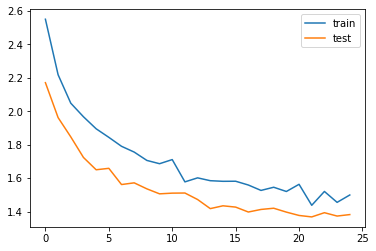

In [36]:
# plot training history
plt.plot(transfer_model_history.history['loss'], label='train')
plt.plot(transfer_model_history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [40]:
# Score trained model.
scores = transfer_model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 9s 28ms/step - loss: 1.3859 - accuracy: 0.5149
Test loss: 1.385927438735962
Test accuracy: 0.5149000287055969


Label 
 Label Id: 0 
 Name: airplane
0
1
2
3
4
5
6
7
8
9
10


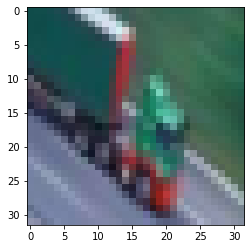

In [38]:
# Example of Data Augmentation
i = 50
image = x_train[i]
label = y_train[i][0]
#print(' Label \n Label Id: {} \n Name: {}'.format(label, label_dict[label]))
print(f'Label \n Label Id: {label} \n Name: {label_dict[label]}')
plt.imshow(image);
datagen_truck = ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1, rotation_range = 2, horizontal_flip = True, zoom_range = .1)
# flow command generates batches of randomly generated images
j = 0
for batch in datagen_truck.flow(x_train[i].reshape(1,32,32,3),batch_size=1,save_to_dir='/content/drive/MyDrive/GL_Mentor/Data/Truck/',save_prefix='truck',save_format='jpeg'):
  print(j)
  j = j + 1
  if j > 10:
    break

In [42]:
# Split the data into Train and Test Set
import cv2
import os

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [43]:
truck_image = load_images_from_folder('/content/drive/MyDrive/GL_Mentor/Data/Truck/')
# Get the augmented images created
truck_image = np.array(truck_image)

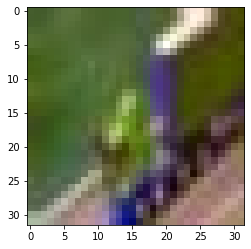

In [54]:
i = 5
image = truck_image[i]
plt.imshow(image);

In [55]:
#Random Labels for train test split
y = np.array(['1','1','1','1','1','1','1','1','1','1','1'])
y.shape

(11,)

In [57]:
# Before splitting, make sure you check shape for X and Y variables
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(truck_image, y, test_size=0.3, random_state=42)

In [58]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7, 32, 32, 3)
(4, 32, 32, 3)
(7,)
(4,)
